In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
# genenrate a dataset
def synthetic_data(w, b, num_examples):  #@save
    # noise of y=Xw+b
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print("features: ", features[0], "\nlabels: ", labels[0])

features:  tensor([-1.4676,  1.1776]) 
labels:  tensor([-2.7456])


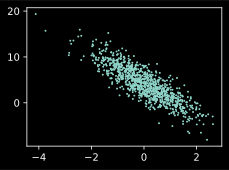

In [4]:
# scatter plot
d2l.set_figsize()
d2l.plt.scatter(features[:, (-1)].detach().numpy(), labels.detach().numpy(), 1)

In [5]:
# generate batches
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i : min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [6]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, "\n", y)
    break

tensor([[-1.5348,  0.5735],
        [ 1.0887, -1.1651],
        [ 0.7227,  1.8301],
        [-0.4903, -1.5961],
        [-0.9091,  1.2294],
        [-2.4695,  1.7254],
        [-0.4028, -0.0791],
        [ 0.4358,  1.0601],
        [ 0.6013, -1.1258],
        [-0.8934, -0.1738]]) 
 tensor([[-0.8219],
        [10.3431],
        [-0.5884],
        [ 8.6401],
        [-1.7965],
        [-6.6091],
        [ 3.6781],
        [ 1.4544],
        [ 9.2467],
        [ 3.0170]])


In [7]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [8]:
def linreg(X, w, b):  #@save
    # linear regression model
    return torch.matmul(X, w) + b

In [9]:
def squared_loss(y_hat, y):  #@save
    # mean squared loss
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [10]:
def sgd(params, lr, batch_size):  #@save
    # stochastic gradiet descent
    # lr stands for learning rate
    with torch.no_grad(): # no_grad means only updating the value but not calculating the gradient
        for param in params:
            param -= lr * param.grad / batch_size # gradient descent
            param.grad.zero_()

In [11]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f"epoch {epoch+1}, loss {float(train_l.mean()):f}")

epoch 1, loss 0.046819
epoch 2, loss 0.000200
epoch 3, loss 0.000053


In [12]:
print(f"error of w: {true_w-w.reshape(true_w.shape)}")
print(f"error of b: {true_b-b}")

error of w: tensor([ 0.0016, -0.0006], grad_fn=<SubBackward0>)
error of b: tensor([0.0008], grad_fn=<RsubBackward1>)
